## Introduction:

For this project I was asked to perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

### First I must import the dataset from Moodle into this notebook.

I did this by first copying the data set from https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv to my project repository.

Then used pandas to read the csv and print the data set in the Jupyter Notebook.

In [1]:
import pandas as pd

data = pd.read_csv ("data.csv")
print(data)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


### Next step is to import the libraries I'll need for plotting and data analysis.

In [ ]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

import numpy as np  # numpy efficiently deals with numerical multi-dimensional arrays.
import matplotlib.pyplot as plt  # matplotlib is a plotting library, and pyplot is its easy-to-use module.



### Then, I plot the data set and do a simple linear regression to find the line of best fit.

m is 4.917596 and c is -13.899903.


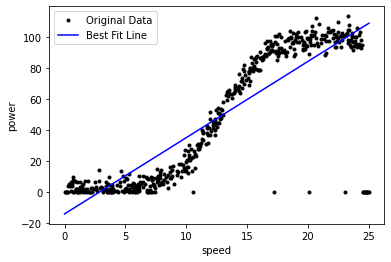

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data.csv")

# w_avg = np.mean(w)
# d_avg = np.mean(d)

# # Subtract means from w and d.
# w_zero = w - w_avg
# d_zero = d - d_avg

# # The best m is found by the following calculation.
# m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# # Use m from above to calculate the best c.
# c = d_avg - m * w_avg

# print("m is %8.6f and c is %6.6f." % (m, c))

speed = data.speed
power = data.power

average_speed = speed.mean()
average_power = power.mean()

speed_zero = speed - average_speed
power_zero = power - average_power

slope = np.sum(speed_zero * power_zero) / np.sum(speed_zero * speed_zero)
constant = average_power - slope * average_speed
print("m is %8.6f and c is %6.6f." % (slope, constant))

plt.plot(speed, power, 'k.', label="Original Data")
plt.plot(speed, slope * speed + constant, "b-", label="Best Fit Line")

plt.xlabel('speed')
plt.ylabel('power')
plt.legend()

plt.show()

In [18]:
### Relationship for linear regression
### https://www.w3schools.com/python/python_ml_linear_regression.asp

from scipy import stats
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd

# Load a dataset.
data = pd.read_csv('data.csv')

x = data.speed.tolist()
y = data.power.tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.8537775037188597


## Analysis:

Looking at the graph, I can see that the best power output of the wind turbines is between 13 and 25 kmph. Any speeds above 25 kmph actually have a negative effect on the power output, which was surprising to me, as I predicted that the faster the wind turbines rotate, the more power would be produced.

After plotting the data set and line of best fit, I tested the relationship between coefficients and line of best fit for linear regression.
In this relationship test, there are three possible results: a 0 result shows that there is no relationship at all between coefficients and line of best fit, a 1 shows 100% relationship between coefficients and line of best fit, and anything between 0 and 1 shows the degree to which there is a relationship between the coefficients and line of best fit.

The relationship test for simple linear regression result came up as 0.85, so it's a very positive relationship.
I was curious to see if there was another type of regression that would produce an even closer fit to the the data set, so I then plotted out the data set with polynomial regression.

### Plotting data set with polynomial regression

0.8796883953739737


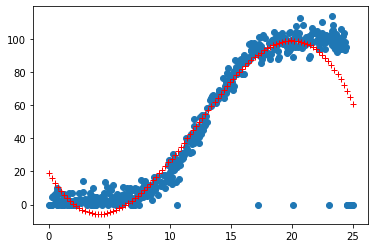

In [27]:
### Polynomial Regression
### https://www.w3schools.com/python/python_ml_polynomial_regression.asp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from sklearn.metrics import r2_score

# Load a dataset.
data = pd.read_csv('data.csv')

x = data.speed.tolist()
y = data.power.tolist()

mymodel = np.poly1d(np.polyfit(x, y, 3))

### Relationship of coefficients
print(r2_score(y, mymodel(x)))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline), "r+")
plt.show()

## Analysis:

Looking at the polynomial regression graph, I can immediately see that the polynomial regression line is a much better visual fit to the data set. It also shows the same relationship between the speed and power as in the linear regression graph.

I tested the relationship between the coefficients and line of best fit for the polynomial regression and the result was 0.87. This surprised me a little becuase the polynomial line of best fit was visually so much better than the simple linear regression. I would have predicted the relationship to be closer to 0.90 or above. However, polynomial regression is still the better fit to the data set than simple linear regression.


### References:

https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv

https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/fitting-lines.ipynb

https://stackoverflow.com/questions/55209661/how-to-load-csv-file-in-jupyter-notebook/55217635

https://www.dummies.com/education/math/statistics/how-to-calculate-a-correlation/

https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

https://web.microsoftstream.com/video/24fb96b4-cc6c-43e9-987b-5ab44b52cfc5

https://www.geeksforgeeks.org/python-pandas-dataframe-mean/

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

https://www.w3schools.com/python/python_ml_linear_regression.asp

https://www.w3schools.com/python/python_ml_polynomial_regression.asp